#### Fitting a model for predict the price of Bitcoin 
Using only historical Bitcoin data from blockchain.info

In [2]:
% matplotlib inline

import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas
from sklearn.externals import joblib
from sklearn.svm import SVR

file = 'data/bitcoin/market-price.blockchain.info.csv'
df = pandas.read_csv(file,
                     header=None,
                     names=['Date', 'Close Price'],
                     index_col='Date',
                     parse_dates=True,
                     na_values=['nan'])

# select only some dates using an index and an inner join 
dates = pandas.date_range('2016/10/01', '2016/10/31')
selected_df = pandas.DataFrame(index=dates)
selected_df = selected_df.join(df)
selected_df.head()

,Close Price
2016-10-01,614.823800
2016-10-02,610.518912
2016-10-03,611.851100
2016-10-04,609.624812
2016-10-05,612.352287


m samples x n features
X  (31, 1)
y  (31,)
start svr rbf fitting 2016-12-05 15:41:29.560239
end svr rbf fitting 2016-12-05 15:41:29.597273


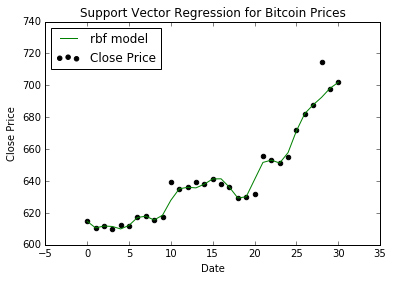

In [7]:
dts = selected_df.index.values.astype(datetime.datetime) / 1e9
X = np.arange(0, len(dts))
X = np.reshape(X, (len(X), 1))  # n samples x m features in this case n x 1
y = np.asarray(selected_df['Close Price'])

print('m samples x n features')
print('X ', X.shape)
print('y ', y.shape)

clf_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

print('start svr rbf fitting ' + str(datetime.datetime.now()))
clf_rbf.fit(X, y)
joblib.dump(clf_rbf, 'data/model/rbf.pkl')
print('end svr rbf fitting ' + str(datetime.datetime.now()))

plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='black', label='Close Price')  # plotting the initial datapoints
plt.plot(X, clf_rbf.predict(X), color='green', label='rbf model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Support Vector Regression for Bitcoin Prices')
plt.legend(loc='upper left')
plt.show()

#### Fitting a model for predict the price of Bitcoin 
Using sentiment analysis from Bitcoin news corpus

In [8]:
import codecs
import pickle

pkz_file = 'data/sentiment/all.pkz'
with open(pkz_file, 'rb') as f:
    compressed_content = f.read()
sentiment = pickle.loads(codecs.decode(compressed_content, 'zlib_codec'))

sentiment_df = pandas.DataFrame(
    [[v['Verynegative'] if 'Verynegative' in v else 0,
      v['Negative'] if 'Negative' in v else 0,
      v['Neutral'] if 'Neutral' in v else 0,
      v['Positive'] if 'Positive' in v else 0,
      v['Verypositive'] if 'Verypositive' in v else 0] for k, v in sentiment.items()],
    columns=['Verynegative', 'Negative', 'Neutral', 'Positive', 'Verypositive'], 
    index=[datetime.datetime.strptime(k, '%Y%m%d').date() for k in sentiment.keys()]
)
sentiment_df = sentiment_df.sort_index(ascending=True)
sentiment_df.head()

,Verynegative,Negative,Neutral,Positive,Verypositive
2016-10-01,22,334,38,66,5
2016-10-02,23,515,71,102,2
2016-10-03,43,508,69,103,1
2016-10-04,43,736,127,129,2
2016-10-05,49,613,69,101,4


In [43]:
import codecs
import pickle

pkz_file = 'data/sentiment/all.pkz'
with open(pkz_file, 'rb') as f:
    compressed_content = f.read()
sentiment = pickle.loads(codecs.decode(compressed_content, 'zlib_codec'))

sentiment_df = pandas.DataFrame(
    [[v['Verynegative'] if 'Verynegative' in v else 0,
      v['Negative'] if 'Negative' in v else 0,
      v['Neutral'] if 'Neutral' in v else 0,
      v['Positive'] if 'Positive' in v else 0,
      v['Verypositive'] if 'Verypositive' in v else 0] for k, v in sentiment.items()],
    columns=['Verynegative', 'Negative', 'Neutral', 'Positive', 'Verypositive'], 
    index=[datetime.datetime.strptime(k, '%Y%m%d').date() for k in sentiment.keys()]
)
sentiment_df = sentiment_df.sort_index(ascending=True)
# df.head()

file = 'data/bitcoin/market-price.blockchain.info.csv'
df = pandas.read_csv(file,
                     header=None,
                     names=['Date', 'Close Price'],
                     index_col='Date',
                     parse_dates=True,
                     na_values=['nan'])

# select only some dates using an index and an inner join 
dates = pandas.date_range('2016/10/01', '2016/10/31')
selected_df = pandas.DataFrame(index=dates)
selected_df = selected_df.join(df)  # how='inner' inverts
selected_df = selected_df.join(sentiment_df)  # how='inner' inverts
selected_df.head()
# selected_df.tail()

,Close Price,Verynegative,Negative,Neutral,Positive,Verypositive
2016-10-01,614.823800,22,333,38,66,5
2016-10-02,610.518912,23,514,71,102,2
2016-10-03,611.851100,40,505,67,103,1
2016-10-04,609.624812,42,733,126,128,2
2016-10-05,612.352287,49,609,69,101,4


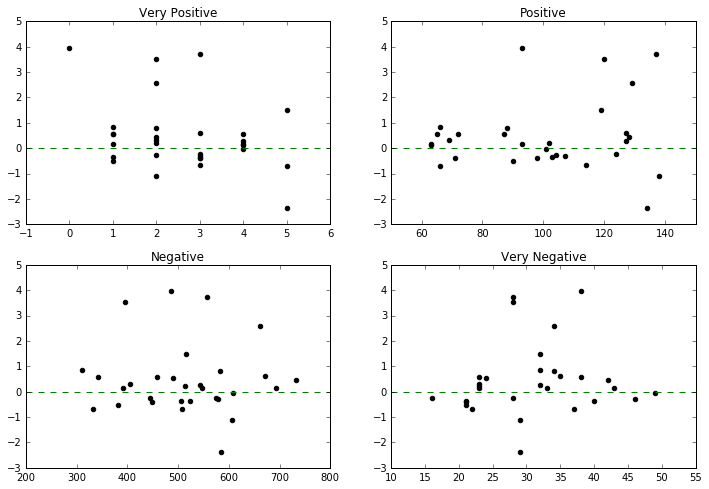

In [71]:
def calc_daily_returns(df):
    dfcopy = df.copy()
    dfcopy.ix[0] = 0
    dfcopy[1:] = df[1:] / df.values[:-1] - 1
    return dfcopy

dr = calc_daily_returns(selected_df['Close Price'])
y = dr.values*100

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(221)
ax1.title.set_text('Very Positive')
X = selected_df[['Verypositive']].values
ax1.scatter(X[0:30, 0], y[1:31], color='black', label='Close Price')  # plotting the initial datapoints
ax1.axhline(0, color='g', linestyle='--', linewidth='1')

ax2 = fig.add_subplot(222)
ax2.title.set_text('Positive')
X = selected_df[['Positive']].values
ax2.scatter(X[0:30, 0], y[1:31], color='black', label='Close Price')  # plotting the initial datapoints
ax2.axhline(0, color='g', linestyle='--', linewidth='1')

ax3 = fig.add_subplot(223)
ax3.title.set_text('Negative')
X = selected_df[['Negative']].values
ax3.scatter(X[0:30, 0], y[1:31], color='black', label='Close Price')  # plotting the initial datapoints
ax3.axhline(0, color='g', linestyle='--', linewidth='1')

ax4 = fig.add_subplot(224)
ax4.title.set_text('Very Negative')
X = selected_df[['Verynegative']].values
ax4.scatter(X[0:30, 0], y[1:31], color='black', label='Close Price')  # plotting the initial datapoints
ax4.axhline(0, color='g', linestyle='--', linewidth='1')

plt.show()

[]

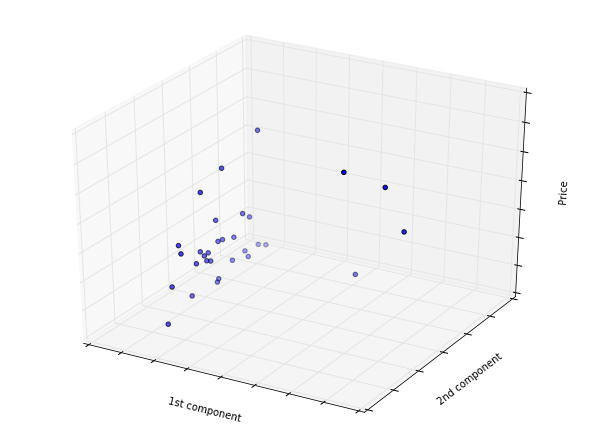

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
# ax = Axes3D(fig, elev=-150, azim=110)
ax = Axes3D(fig)
X_reduced = PCA(n_components=2).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], y)
ax.set_title("")
ax.set_xlabel("1st component")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd component")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Price")
ax.w_zaxis.set_ticklabels([])

In [44]:
selected_df

,Close Price,Verynegative,Negative,Neutral,Positive,Verypositive
2016-10-01,614.823800,22,333,38,66,5
2016-10-02,610.518912,23,514,71,102,2
2016-10-03,611.851100,40,505,67,103,1
2016-10-04,609.624812,42,733,126,128,2
2016-10-05,612.352287,49,609,69,101,4
2016-10-06,612.088750,32,310,51,66,1
2016-10-07,617.210350,23,392,46,63,4
2016-10-08,618.046000,21,448,61,98,3
2016-10-09,615.656750,23,405,86,69,2
2016-10-10,617.548250,28,396,721,120,2


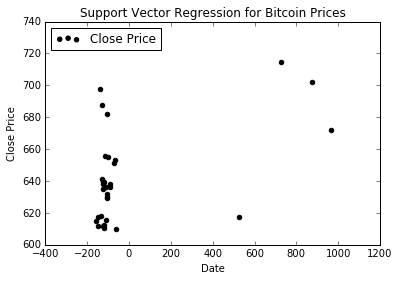

In [37]:
from mpl_toolkits.mplot3d import Axes3D

X_reduced = PCA(n_components=1).fit_transform(X)
plt.figure(figsize=(6, 4))
plt.scatter(X_reduced[:, 0], y, color='black', label='Close Price')  # plotting the initial datapoints
# plt.scatter(X_reduced[:, 0], clf_rbf.predict(X), color='green', label='rbf model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Support Vector Regression for Bitcoin Prices')
plt.legend(loc='upper left')
plt.show()

In [39]:
#### Predicting the price next week month?
dates = pandas.date_range('2016/11/01', '2016/11/07')
selected_df = pandas.DataFrame(index=dates)
selected_df = selected_df.join(df)  # how='inner' inverts
selected_df = selected_df.join(sentiment_df)  # how='inner' inverts
selected_df

,Close Price,Verynegative,Negative,Neutral,Positive,Verypositive
2016-11-01,728.206887,35,465,69,93,2
2016-11-02,733.336125,33,623,100,108,5
2016-11-03,686.170875,27,413,63,84,2
2016-11-04,703.694088,30,534,79,108,2
2016-11-05,704.790900,32,388,57,83,1
2016-11-06,712.003250,31,386,64,90,1
2016-11-07,703.819000,40,438,85,110,3


In [31]:
from sklearn.decomposition import PCA
from sklearn.externals import joblib
from sklearn.svm import SVR

X = selected_df[['Verynegative', 'Negative', 'Neutral', 'Positive', 'Verypositive']].values
y = np.asarray(selected_df['Close Price'])

print('m samples x n features')
print('X ', X.shape)
print('y ', y.shape)

clf_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1, verbose=True)

print('start svr rbf fitting ' + str(datetime.datetime.now()))
clf_rbf.fit(X, y)
joblib.dump(clf_rbf, 'data/model/sentiment_rbf.pkl')
print('end svr rbf fitting ' + str(datetime.datetime.now()))

m samples x n features
X  (31, 5)
y  (31,)
start svr rbf fitting 2016-12-05 17:07:37.415879
[LibSVM]end svr rbf fitting 2016-12-05 17:07:37.477439


In [42]:
X = selected_df[['Verynegative', 'Negative', 'Neutral', 'Positive', 'Verypositive']].values
print(X)
clf_rbf.predict(X)

[[ 35 465  69  93   2]
 [ 33 623 100 108   5]
 [ 27 413  63  84   2]
 [ 30 534  79 108   2]
 [ 32 388  57  83   1]
 [ 31 386  64  90   1]
 [ 40 438  85 110   3]]


array([ 642.19927146,  642.19927146,  642.19927146,  642.19927146,
        642.19927146,  642.19926895,  642.19927146])